# Importing Libraries

In [1]:
from functions.adversarial import *
from functions.classification import *
#from functions.dip.DIP import *
import cv2
import numpy as np
from utils import *
import matplotlib.pyplot as plt
from functions.imagenet_classes import classes

# Observing DIP effects on adversarial examples

Test on an adversarial image created from FGSM and LLCI with $\epsilon=25$.

1. First we will generetate the adversarial example.
2. Pass the adversarial examples through DIP and save the averaged output every $100$ iterations.
3. Then observe the classification confidence of the correct classification

## FGSM, $\epsilon=25$

### FGSM,  $\epsilon=25$ - Generation

In [ ]:
adv, orig, pert = adversarial_examples('data/panda.jpg',model_name = 'resnet18', method='FGSM',eps=25, show=False)

# Process image into the right format
img = adv.copy().astype(np.float32)
img /= 255.0
inpt = np_to_torch(img.transpose(2,0,1))

iterations = 10001
output = DIP(inpt, save = True, save_path = 'results/Adv_DIP/FGSM_eps25', num_iter = iterations, PLOT = False)

### FGSM,  $\epsilon=25$ - Classification

In [ ]:
# Find original classification class
P, R = classification(orig, model_name = 'resnet18', sort = True, show=False)
original_class = R[0,0]
P, R = classification(adv, model_name = 'resnet18', sort = True, show=False)
final_classes = R[0,0:5]
# Create matrix to store values
Confidence = np.ones([round((iterations-1)/100+1),6])
Ranks_matrix = np.ones([round((iterations-1)/100+1),5])

for i in range(round((iterations-1)/100+1)):
    orig = cv2.imread("results/Adv_DIP/FGSM_eps25/it_{}.png".format(i*100))[..., ::-1]
    orig = cv2.resize(orig, (256, 256))
    img = orig.copy().astype(np.float32)
    Probs, Ranks = classification(img, model_name = 'resnet18', sort = False, show = False)
    Probs_np = torch_to_np(Probs)
    Confidence[i,0] = Probs_np[original_class]
    P , Ranking = Probs.sort(descending=True)
    Ranking_np = torch_to_np(Ranking)
    for j in range(5):
        Confidence[i,j+1] = Probs_np[final_classes[j]]
        Ranks_matrix[i,j] = Ranking_np[j]    

### FGSM,  $\epsilon=25$ - Plotting

In [ ]:
it = np.arange(0, iterations+99, 100)
iters = round((iterations-1)/100+1)
fig = plt.figure(figsize=(6, 6))
plt.xlabel('DIP Iterations')
plt.ylabel('Confidence of true class')
plt.plot(it,Confidence)
plt.show()

# Save stuff
fig.savefig('results/Adv_DIP/FGSM_eps25/Graph_FGSM_eps25_full.png')
np.savetxt('results/Adv_DIP/FGSM_eps25/FGSM_eps25_full.txt', Confidence)
np.savetxt('results/Adv_DIP/FGSM_eps25/FGSM_eps25_ranks.txt', Ranks_matrix)
for i in range(5):
    print(classes[int(Ranks_matrix[-1,i])].split(',')[0])

## LLCI method, $\epsilon=25$

### LLCI,  $\epsilon=25$ - Generation

In [3]:
#Generating adversarial example
adv, orig, pert = adversarial_examples('data/goldfish.jpg',model_name = 'resnet18', method='LLCI',eps=25, show=False)

# Process image into the right format
img = adv.copy().astype(np.float32)
img /= 255.0
inpt = np_to_torch(img.transpose(2,0,1))

# Applying the Deep Image Prior for 10001 iterations and saving every 100
iterations = 10001
output = DIP(inpt, save = True, save_path = 'results/Adv_DIP/goldfish/LLCI_eps25', num_iter = iterations, PLOT = False)

Number of params: 572827
Starting optimization with ADAM


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")
C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:1961: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


### LLCI,  $\epsilon=25$ - Classification

In [4]:
# Find original classification class
P, R = classification(orig, model_name = 'resnet18', sort = True, show=False)
original_class = R[0,0]
P, R = classification(adv, model_name = 'resnet18', sort = True, show=False)
final_classes = R[0,0:5]
# Create matrix to store values
Confidence = np.ones([round((iterations-1)/100+1),6])
Ranks_matrix = np.ones([round((iterations-1)/100+1),5])

for i in range(round((iterations-1)/100+1)):
    orig = cv2.imread("results/Adv_DIP/goldfish/LLCI_eps25/it_{}.png".format(i*100))[..., ::-1]
    orig = cv2.resize(orig, (256, 256))
    img = orig.copy().astype(np.float32)
    Probs, Ranks = classification(img, model_name = 'resnet18', sort = False, show = False)
    Probs_np = torch_to_np(Probs)
    Confidence[i,0] = Probs_np[original_class]
    P , Ranking = Probs.sort(descending=True)
    Ranking_np = torch_to_np(Ranking)
    for j in range(5):
        Confidence[i,j+1] = Probs_np[final_classes[j]]
        Ranks_matrix[i,j] = Ranking_np[j]    

### LLCI,  $\epsilon=25$ - Plotting

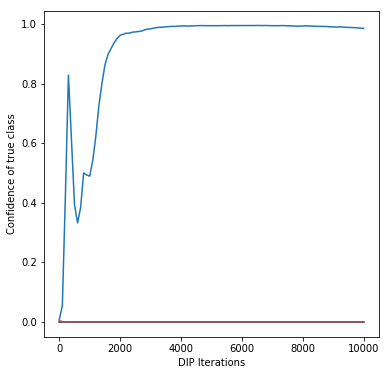

goldfish
axolotl
mushroom
anemone fish
sea slug


In [5]:
it = np.arange(0, iterations+99, 100)
iters = round((iterations-1)/100+1)
fig = plt.figure(figsize=(6, 6))
plt.xlabel('DIP Iterations')
plt.ylabel('Confidence of true class')
plt.plot(it,Confidence)
plt.show()

# Save stuff
fig.savefig('results/Adv_DIP/goldfish/LLCI_eps25/Graph_LLCI_eps25_full.png')
np.savetxt('results/Adv_DIP/goldfish/LLCI_eps25/LLCI_eps25_full.txt', Confidence)
np.savetxt('results/Adv_DIP/goldfish/LLCI_eps25/LLCI_eps25_ranks.txt', Ranks_matrix)
for i in range(5):
    print(classes[int(Ranks_matrix[-1,i])].split(',')[0])

## FGSM, $\epsilon=5$

### FGSM,  $\epsilon=5$ - Generation

In [ ]:
adv, orig, pert = adversarial_examples('data/panda.jpg',model_name = 'resnet18', method='FGSM',eps=5, show=False)

# Process image into the right format
img = adv.copy().astype(np.float32)
img /= 255.0
inpt = np_to_torch(img.transpose(2,0,1))

iterations = 10001
output = DIP(inpt, save = True, save_path = 'results/Adv_DIP/FGSM_eps5', num_iter = iterations, PLOT = False)

### FGSM,  $\epsilon=5$ - Classification

In [ ]:
# Find original classification class
P, R = classification(orig, model_name = 'resnet18', sort = True, show=False)
original_class = R[0,0]
P, R = classification(adv, model_name = 'resnet18', sort = True, show=False)
final_classes = R[0,0:5]
# Create matrix to store values
Confidence = np.ones([round((iterations-1)/100+1),6])
Ranks_matrix = np.ones([round((iterations-1)/100+1),5])

for i in range(round((iterations-1)/100+1)):
    orig = cv2.imread("results/Adv_DIP/FGSM_eps5/it_{}.png".format(i*100))[..., ::-1]
    orig = cv2.resize(orig, (256, 256))
    img = orig.copy().astype(np.float32)
    Probs, Ranks = classification(img, model_name = 'resnet18', sort = False, show = False)
    Probs_np = torch_to_np(Probs)
    Confidence[i,0] = Probs_np[original_class]
    P , Ranking = Probs.sort(descending=True)
    Ranking_np = torch_to_np(Ranking)
    for j in range(5):
        Confidence[i,j+1] = Probs_np[final_classes[j]]
        Ranks_matrix[i,j] = Ranking_np[j]    

### FGSM,  $\epsilon=5$ - Plotting

In [ ]:
it = np.arange(0, iterations+99, 100)
iters = round((iterations-1)/100+1)
fig = plt.figure(figsize=(6, 6))
plt.xlabel('DIP Iterations')
plt.ylabel('Confidence of true class')
plt.plot(it,Confidence)
plt.show()

# Save stuff
fig.savefig('results/Adv_DIP/FGSM_eps5/Graph_FGSM_eps5_full.png')
np.savetxt('results/Adv_DIP/FGSM_eps5/FGSM_eps5_full.txt', Confidence)
np.savetxt('results/Adv_DIP/FGSM_eps5/FGSM_eps5_ranks.txt', Ranks_matrix)
for i in range(5):
    print(classes[int(Ranks_matrix[-1,i])].split(',')[0])

## LCCI, $\epsilon=5$

### LLCI,  $\epsilon=5$ - Generation

In [ ]:
#Generating adversarial example
adv, orig, pert = adversarial_examples('data/goldfish.jpg',model_name = 'resnet18', method='LLCI',eps=5, show=False)

# Process image into the right format
img = adv.copy().astype(np.float32)
img /= 255.0
inpt = np_to_torch(img.transpose(2,0,1))

# Applying the Deep Image Prior for 10001 iterations and saving every 100
iterations = 10001
output = DIP(inpt, save = True, save_path = 'results/Adv_DIP/Complex_LLCI_eps5', num_iter = iterations, PLOT = False, arch = 'complex')

### LLCI,  $\epsilon=5$ - Generation

In [6]:
#Generating adversarial example
adv, orig, pert = adversarial_examples('data/goldfish.jpg',model_name = 'resnet18', method='LLCI',eps=5, show=False)

# Process image into the right format
img = adv.copy().astype(np.float32)
img /= 255.0
inpt = np_to_torch(img.transpose(2,0,1))

# Applying the Deep Image Prior for 10001 iterations and saving every 100
iterations = 10001
output = DIP(inpt, save = True, save_path = 'results/Adv_DIP/goldfish/LLCI_eps5', num_iter = iterations, PLOT = False)

Number of params: 572827
Starting optimization with ADAM


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")
C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:1961: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


### LLCI,  $\epsilon=5$ - Classification

In [7]:
# Find original classification class
P, R = classification(orig, model_name = 'resnet18', sort = True, show=False)
original_class = R[0,0]
P, R = classification(adv, model_name = 'resnet18', sort = True, show=False)
final_classes = R[0,0:5]
# Create matrix to store values
Confidence = np.ones([round((iterations-1)/100+1),6])
Ranks_matrix = np.ones([round((iterations-1)/100+1),5])

for i in range(round((iterations-1)/100+1)):
    orig = cv2.imread("results/Adv_DIP/goldfish/LLCI_eps5/it_{}.png".format(i*100))[..., ::-1]
    orig = cv2.resize(orig, (256, 256))
    img = orig.copy().astype(np.float32)
    Probs, Ranks = classification(img, model_name = 'resnet18', sort = False, show = False)
    Probs_np = torch_to_np(Probs)
    Confidence[i,0] = Probs_np[original_class]
    P , Ranking = Probs.sort(descending=True)
    Ranking_np = torch_to_np(Ranking)
    for j in range(5):
        Confidence[i,j+1] = Probs_np[final_classes[j]]
        Ranks_matrix[i,j] = Ranking_np[j]  

### LLCI,  $\epsilon=5$ - Plotting

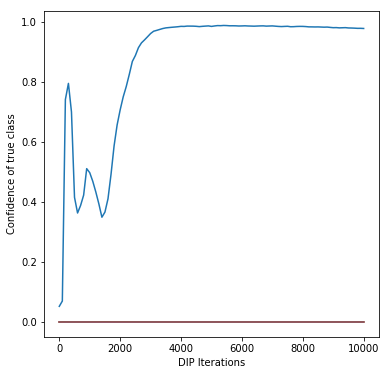

goldfish
axolotl
sea slug
anemone fish
American chameleon


In [8]:
it = np.arange(0, iterations+99, 100)
iters = round((iterations-1)/100+1)
fig = plt.figure(figsize=(6, 6))
plt.xlabel('DIP Iterations')
plt.ylabel('Confidence of true class')
plt.plot(it,Confidence)
plt.show()

# Save stuff
fig.savefig('results/Adv_DIP/goldfish/LLCI_eps5/Graph_LLCI_eps5_full.png')
np.savetxt('results/Adv_DIP/goldfish/LLCI_eps5/LLCI_eps5_full.txt', Confidence)
np.savetxt('results/Adv_DIP/goldfish/LLCI_eps5/LLCI_eps5_ranks.txt', Ranks_matrix)
for i in range(5):
    print(classes[int(Ranks_matrix[-1,i])].split(',')[0])

## FSGM, $\epsilon=100$

### FGSM,  $\epsilon=100$ - Generation

In [ ]:
adv, orig, pert = adversarial_examples('data/panda.jpg',model_name = 'resnet18', method='FGSM',eps=100, show=False)

# Process image into the right format
img = adv.copy().astype(np.float32)
img /= 255.0
inpt = np_to_torch(img.transpose(2,0,1))

iterations = 10001
output = DIP(inpt, save = True, save_path = 'results/Adv_DIP/FGSM_eps100', num_iter = iterations, PLOT = False)

### FGSM,  $\epsilon=100$ - Classification

In [ ]:
# Find original classification class
P, R = classification(orig, model_name = 'resnet18', sort = True, show=False)
original_class = R[0,0]
P, R = classification(adv, model_name = 'resnet18', sort = True, show=False)
final_classes = R[0,0:5]
# Create matrix to store values
Confidence = np.ones([round((iterations-1)/100+1),6])
Ranks_matrix = np.ones([round((iterations-1)/100+1),5])

for i in range(round((iterations-1)/100+1)):
    orig = cv2.imread("results/Adv_DIP/FGSM_eps100/it_{}.png".format(i*100))[..., ::-1]
    orig = cv2.resize(orig, (256, 256))
    img = orig.copy().astype(np.float32)
    Probs, Ranks = classification(img, model_name = 'resnet18', sort = False, show = False)
    Probs_np = torch_to_np(Probs)
    Confidence[i,0] = Probs_np[original_class]
    P , Ranking = Probs.sort(descending=True)
    Ranking_np = torch_to_np(Ranking)
    for j in range(5):
        Confidence[i,j+1] = Probs_np[final_classes[j]]
        Ranks_matrix[i,j] = Ranking_np[j]    

### FGSM,  $\epsilon=100$ - Plotting

In [ ]:
it = np.arange(0, iterations+99, 100)
iters = round((iterations-1)/100+1)
fig = plt.figure(figsize=(6, 6))
plt.xlabel('DIP Iterations')
plt.ylabel('Confidence of true class')
plt.plot(it,Confidence)
plt.show()

# Save stuff
fig.savefig('results/Adv_DIP/FGSM_eps100/Graph_FGSM_eps100_full.png')
np.savetxt('results/Adv_DIP/FGSM_eps100/FGSM_eps100_full.txt', Confidence)
np.savetxt('results/Adv_DIP/FGSM_eps100/FGSM_eps100_ranks.txt', Ranks_matrix)
for i in range(5):
    print(classes[int(Ranks_matrix[-1,i])].split(',')[0])

## LLCI, $\epsilon=100$

### LLCI,  $\epsilon=100$ - Generation

In [9]:
#Generating adversarial example
adv, orig, pert = adversarial_examples('data/goldfish.jpg',model_name = 'resnet18', method='LLCI',eps=100, show=False)

# Process image into the right format
img = adv.copy().astype(np.float32)
img /= 255.0
inpt = np_to_torch(img.transpose(2,0,1))

# Applying the Deep Image Prior for 10001 iterations and saving every 100
iterations = 10001
output = DIP(inpt, save = True, save_path = 'results/Adv_DIP/goldfish/LLCI_eps100', num_iter = iterations, PLOT = False)

Number of params: 572827
Starting optimization with ADAM


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")
C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:1961: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


### FGSM,  $\epsilon=100$ - Classification

In [10]:
# Find original classification class
P, R = classification(orig, model_name = 'resnet18', sort = True, show=False)
original_class = R[0,0]
P, R = classification(adv, model_name = 'resnet18', sort = True, show=False)
final_classes = R[0,0:5]
# Create matrix to store values
Confidence = np.ones([round((iterations-1)/100+1),6])
Ranks_matrix = np.ones([round((iterations-1)/100+1),5])

for i in range(round((iterations-1)/100+1)):
    orig = cv2.imread("results/Adv_DIP/goldfish/LLCI_eps100/it_{}.png".format(i*100))[..., ::-1]
    orig = cv2.resize(orig, (256, 256))
    img = orig.copy().astype(np.float32)
    Probs, Ranks = classification(img, model_name = 'resnet18', sort = False, show = False)
    Probs_np = torch_to_np(Probs)
    Confidence[i,0] = Probs_np[original_class]
    P , Ranking = Probs.sort(descending=True)
    Ranking_np = torch_to_np(Ranking)
    for j in range(5):
        Confidence[i,j+1] = Probs_np[final_classes[j]]
        Ranks_matrix[i,j] = Ranking_np[j]  

### FGSM,  $\epsilon=100$ - Plotting

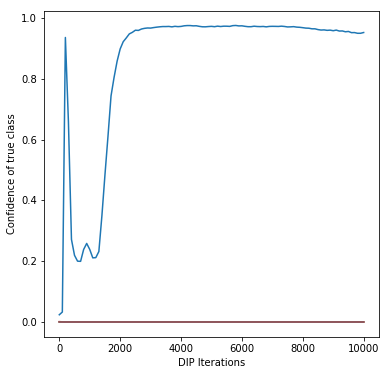

goldfish
frilled lizard
conch
American chameleon
mushroom


In [11]:
it = np.arange(0, iterations+99, 100)
iters = round((iterations-1)/100+1)
fig = plt.figure(figsize=(6, 6))
plt.xlabel('DIP Iterations')
plt.ylabel('Confidence of true class')
plt.plot(it,Confidence)
plt.show()

# Save stuff
fig.savefig('results/Adv_DIP/goldfish/LLCI_eps100/Graph_LLCI_eps100_full.png')
np.savetxt('results/Adv_DIP/goldfish/LLCI_eps100/LLCI_eps100_full.txt', Confidence)
np.savetxt('results/Adv_DIP/goldfish/LLCI_eps100/LLCI_eps100_ranks.txt', Ranks_matrix)
for i in range(5):
    print(classes[int(Ranks_matrix[-1,i])].split(',')[0])

## Basic Iterative method

Will try for $\epsilon = [5, 25, 100]$.

### Starting with eps=5

In [12]:
#Generating adversarial example
adv, orig, pert = adversarial_examples('data/goldfish.jpg',model_name = 'resnet18', method='BI',eps=5, show=False)

# Process image into the right format
img = adv.copy().astype(np.float32)
img /= 255.0
inpt = np_to_torch(img.transpose(2,0,1))

# Applying the Deep Image Prior for 10001 iterations and saving every 100
iterations = 10001
output = DIP(inpt, save = True, save_path = 'results/Adv_DIP/goldfish/BI_eps5', num_iter = iterations, PLOT = False)

Number of params: 572827
Starting optimization with ADAM


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")
C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:1961: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [13]:
# Find original classification class
P, R = classification(orig, model_name = 'resnet18', sort = True, show=False)
original_class = R[0,0]
P, R = classification(adv, model_name = 'resnet18', sort = True, show=False)
final_classes = R[0,0:5]
# Create matrix to store values
Confidence = np.ones([round((iterations-1)/100+1),6])
Ranks_matrix = np.ones([round((iterations-1)/100+1),5])

for i in range(round((iterations-1)/100+1)):
    orig = cv2.imread("results/Adv_DIP/goldfish/BI_eps5/it_{}.png".format(i*100))[..., ::-1]
    orig = cv2.resize(orig, (256, 256))
    img = orig.copy().astype(np.float32)
    Probs, Ranks = classification(img, model_name = 'resnet18', sort = False, show = False)
    Probs_np = torch_to_np(Probs)
    Confidence[i,0] = Probs_np[original_class]
    P , Ranking = Probs.sort(descending=True)
    Ranking_np = torch_to_np(Ranking)
    for j in range(5):
        Confidence[i,j+1] = Probs_np[final_classes[j]]
        Ranks_matrix[i,j] = Ranking_np[j]  

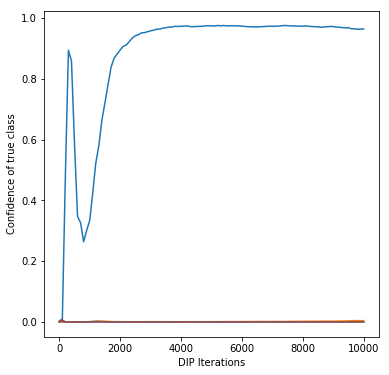

goldfish
axolotl
American chameleon
sea slug
eft


In [14]:
it = np.arange(0, iterations+99, 100)
iters = round((iterations-1)/100+1)
fig = plt.figure(figsize=(6, 6))
plt.xlabel('DIP Iterations')
plt.ylabel('Confidence of true class')
plt.plot(it,Confidence)
plt.show()

# Save stuff
fig.savefig('results/Adv_DIP/goldfish/BI_eps5/Graph_BI_eps5_full.png')
np.savetxt('results/Adv_DIP/goldfish/BI_eps5/BI_eps5_full.txt', Confidence)
np.savetxt('results/Adv_DIP/goldfish/BI_eps5/BI_eps5_ranks.txt', Ranks_matrix)
for i in range(5):
    print(classes[int(Ranks_matrix[-1,i])].split(',')[0])

### Starting with eps=25

In [15]:
#Generating adversarial example
adv, orig, pert = adversarial_examples('data/goldfish.jpg',model_name = 'resnet18', method='BI',eps=25, show=False)

# Process image into the right format
img = adv.copy().astype(np.float32)
img /= 255.0
inpt = np_to_torch(img.transpose(2,0,1))

# Applying the Deep Image Prior for 10001 iterations and saving every 100
iterations = 10001
output = DIP(inpt, save = True, save_path = 'results/Adv_DIP/goldfish/BI_eps25', num_iter = iterations, PLOT = False)

Number of params: 572827
Starting optimization with ADAM


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")
C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:1961: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [16]:
# Find original classification class
P, R = classification(orig, model_name = 'resnet18', sort = True, show=False)
original_class = R[0,0]
P, R = classification(adv, model_name = 'resnet18', sort = True, show=False)
final_classes = R[0,0:5]
# Create matrix to store values
Confidence = np.ones([round((iterations-1)/100+1),6])
Ranks_matrix = np.ones([round((iterations-1)/100+1),5])

for i in range(round((iterations-1)/100+1)):
    orig = cv2.imread("results/Adv_DIP/goldfish/BI_eps25/it_{}.png".format(i*100))[..., ::-1]
    orig = cv2.resize(orig, (256, 256))
    img = orig.copy().astype(np.float32)
    Probs, Ranks = classification(img, model_name = 'resnet18', sort = False, show = False)
    Probs_np = torch_to_np(Probs)
    Confidence[i,0] = Probs_np[original_class]
    P , Ranking = Probs.sort(descending=True)
    Ranking_np = torch_to_np(Ranking)
    for j in range(5):
        Confidence[i,j+1] = Probs_np[final_classes[j]]
        Ranks_matrix[i,j] = Ranking_np[j]  

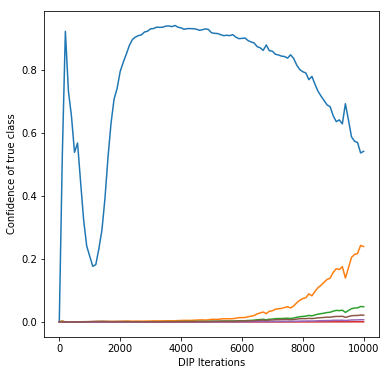

goldfish
American chameleon
green lizard
banded gecko
tree frog


In [17]:
it = np.arange(0, iterations+99, 100)
iters = round((iterations-1)/100+1)
fig = plt.figure(figsize=(6, 6))
plt.xlabel('DIP Iterations')
plt.ylabel('Confidence of true class')
plt.plot(it,Confidence)
plt.show()

# Save stuff
fig.savefig('results/Adv_DIP/goldfish/BI_eps25/Graph_BI_eps25.png')
np.savetxt('results/Adv_DIP/goldfish/BI_eps25/BI_eps25_full.txt', Confidence)
np.savetxt('results/Adv_DIP/goldfish/BI_eps25/BI_eps25_ranks.txt', Ranks_matrix)
for i in range(5):
    print(classes[int(Ranks_matrix[-1,i])].split(',')[0])

### Starting with eps=100

In [18]:
#Generating adversarial example
adv, orig, pert = adversarial_examples('data/goldfish.jpg',model_name = 'resnet18', method='BI',eps=100, show=False)

# Process image into the right format
img = adv.copy().astype(np.float32)
img /= 255.0
inpt = np_to_torch(img.transpose(2,0,1))

# Applying the Deep Image Prior for 10001 iterations and saving every 100
iterations = 10001
output = DIP(inpt, save = True, save_path = 'results/Adv_DIP/goldfish/BI_eps100', num_iter = iterations, PLOT = False)

Number of params: 572827
Starting optimization with ADAM


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")
C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:1961: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [19]:
# Find original classification class
P, R = classification(orig, model_name = 'resnet18', sort = True, show=False)
original_class = R[0,0]
P, R = classification(adv, model_name = 'resnet18', sort = True, show=False)
final_classes = R[0,0:5]
# Create matrix to store values
Confidence = np.ones([round((iterations-1)/100+1),6])
Ranks_matrix = np.ones([round((iterations-1)/100+1),5])

for i in range(round((iterations-1)/100+1)):
    orig = cv2.imread("results/Adv_DIP/goldfish/BI_eps100/it_{}.png".format(i*100))[..., ::-1]
    orig = cv2.resize(orig, (256, 256))
    img = orig.copy().astype(np.float32)
    Probs, Ranks = classification(img, model_name = 'resnet18', sort = False, show = False)
    Probs_np = torch_to_np(Probs)
    Confidence[i,0] = Probs_np[original_class]
    P , Ranking = Probs.sort(descending=True)
    Ranking_np = torch_to_np(Ranking)
    for j in range(5):
        Confidence[i,j+1] = Probs_np[final_classes[j]]
        Ranks_matrix[i,j] = Ranking_np[j]  

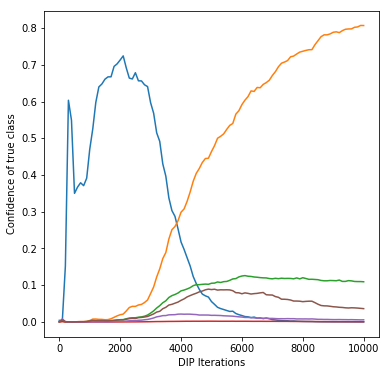

American chameleon
green lizard
African chameleon
banded gecko
frilled lizard


In [20]:
it = np.arange(0, iterations+99, 100)
iters = round((iterations-1)/100+1)
fig = plt.figure(figsize=(6, 6))
plt.xlabel('DIP Iterations')
plt.ylabel('Confidence of true class')
plt.plot(it,Confidence)
plt.show()

# Save stuff
fig.savefig('results/Adv_DIP/goldfish/BI_eps100/Graph_BI_eps100_full.png')
np.savetxt('results/Adv_DIP/goldfish/BI_eps100/BI_eps100_full.txt', Confidence)
np.savetxt('results/Adv_DIP/goldfish/BI_eps100/BI_eps100_ranks.txt', Ranks_matrix)
for i in range(5):
    print(classes[int(Ranks_matrix[-1,i])].split(',')[0])

# Trying out more simple architectures

Using a simple architecture Feature maps = 3 x 16 x 16 x 16

In [2]:
#Generating adversarial example
adv, orig, pert = adversarial_examples('data/goldfish.jpg',model_name = 'resnet18', method='FGSM',eps=5, show=False)

# Process image into the right format
img = adv.copy().astype(np.float32)
img /= 255.0
inpt = np_to_torch(img.transpose(2,0,1))

# Applying the Deep Image Prior for 10001 iterations and saving every 100
iterations = 10001
output = DIP(inpt, save = True, save_path = 'results/Adv_DIP/Simple_FGSM_5', num_iter=iterations, PLOT=False, arch='simple')

Number of params: 26575
Starting optimization with ADAM


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")
C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:1961: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [5]:
# Find original classification class
P, R = classification(orig, model_name = 'resnet18', sort = True, show=False)
original_class = R[0,0]
P, R = classification(adv, model_name = 'resnet18', sort = True, show=False)
final_classes = R[0,0:5]

# Create matrix to store values
Confidence = np.ones([round((iterations-1)/100+1),6])
Ranks_matrix = np.ones([round((iterations-1)/100+1),5])

for i in range(round((iterations-1)/100+1)):
    orig = cv2.imread("results/Adv_DIP/Simple_FGSM_5/it_{}.png".format(i*100))[..., ::-1]
    orig = cv2.resize(orig, (256, 256))
    img = orig.copy().astype(np.float32)
    Probs, Ranks = classification(img, model_name = 'resnet18', sort = False, show = False)
    Probs_np = torch_to_np(Probs)
    Confidence[i,0] = Probs_np[original_class]
    P , Ranking = Probs.sort(descending=True)
    Ranking_np = torch_to_np(Ranking)
    for j in range(5):
        Confidence[i,j+1] = Probs_np[final_classes[j]]
        Ranks_matrix[i,j] = Ranking_np[j]  

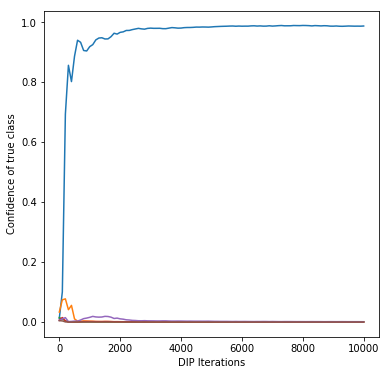

goldfish
axolotl
sea slug
anemone fish
eft


In [11]:
it = np.arange(0, iterations+99, 100)
iters = round((iterations-1)/100+1)
fig = plt.figure(figsize=(6, 6))
plt.xlabel('DIP Iterations')
plt.ylabel('Confidence of true class')
plt.plot(it,Confidence)
plt.show()

# Save stuff
fig.savefig('results/Adv_DIP/Simple_FGSM_5/Graph_Simple_FGSM_5_full.png')
np.savetxt('results/Adv_DIP/Simple_FGSM_5/Simple_FGSM_5_full.txt', Confidence)
np.savetxt('results/Adv_DIP/Simple_FGSM_5/Simple_FGSM_5_ranks.txt', Ranks_matrix)
for i in range(5):
    print(classes[int(Ranks_matrix[-1,i])].split(',')[0])

In [3]:
#Generating adversarial example
adv, orig, pert = adversarial_examples('data/goldfish.jpg',model_name = 'resnet18', method='FGSM',eps=25, show=False)

# Process image into the right format
img = adv.copy().astype(np.float32)
img /= 255.0
inpt = np_to_torch(img.transpose(2,0,1))

# Applying the Deep Image Prior for 10001 iterations and saving every 100
iterations = 10001
output = DIP(inpt, save = True, save_path = 'results/Adv_DIP/Simple_FGSM_25', num_iter=iterations, PLOT=False, arch='simple')

Number of params: 26575
Starting optimization with ADAM


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")
C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:1961: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [12]:
# Find original classification class
P, R = classification(orig, model_name = 'resnet18', sort = True, show=False)
original_class = R[0,0]
P, R = classification(adv, model_name = 'resnet18', sort = True, show=False)
final_classes = R[0,0:5]

# Create matrix to store values
Confidence = np.ones([round((iterations-1)/100+1),6])
Ranks_matrix = np.ones([round((iterations-1)/100+1),5])

for i in range(round((iterations-1)/100+1)):
    orig = cv2.imread("results/Adv_DIP/Simple_FGSM_25/it_{}.png".format(i*100))[..., ::-1]
    orig = cv2.resize(orig, (256, 256))
    img = orig.copy().astype(np.float32)
    Probs, Ranks = classification(img, model_name = 'resnet18', sort = False, show = False)
    Probs_np = torch_to_np(Probs)
    Confidence[i,0] = Probs_np[original_class]
    P , Ranking = Probs.sort(descending=True)
    Ranking_np = torch_to_np(Ranking)
    for j in range(5):
        Confidence[i,j+1] = Probs_np[final_classes[j]]
        Ranks_matrix[i,j] = Ranking_np[j]  

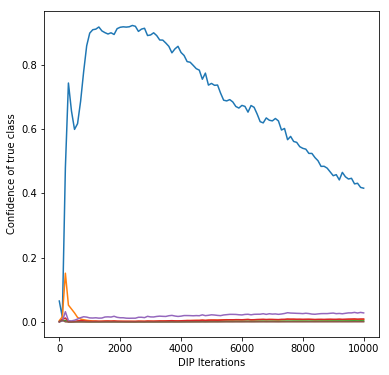

goldfish
sea slug
eft
American chameleon
coral fungus


In [13]:
it = np.arange(0, iterations+99, 100)
iters = round((iterations-1)/100)
fig = plt.figure(figsize=(6, 6))
plt.xlabel('DIP Iterations')
plt.ylabel('Confidence of true class')
plt.plot(it,Confidence)
plt.show()

# Save stuff
fig.savefig('results/Adv_DIP/Simple_FGSM_25/Graph_Simple_FGSM_25_full.png')
np.savetxt('results/Adv_DIP/Simple_FGSM_25/Simple_FGSM_25_full.txt', Confidence)
np.savetxt('results/Adv_DIP/Simple_FGSM_25/Simple_FGSM_25_ranks.txt', Ranks_matrix)
for i in range(5):
    print(classes[int(Ranks_matrix[-1,i])].split(',')[0])

In [4]:
#Generating adversarial example
adv, orig, pert = adversarial_examples('data/goldfish.jpg',model_name = 'resnet18', method='FGSM',eps=100, show=False)

# Process image into the right format
img = adv.copy().astype(np.float32)
img /= 255.0
inpt = np_to_torch(img.transpose(2,0,1))

# Applying the Deep Image Prior for 10001 iterations and saving every 100
itn = 10001
output = DIP(inpt, save = True, save_path = 'results/Adv_DIP/Simple_FGSM_100', num_iter=itn, PLOT=False, arch='simple')

Number of params: 26575
Starting optimization with ADAM


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")
C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:1961: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [14]:
# Find original classification class
P, R = classification(orig, model_name = 'resnet18', sort = True, show=False)
original_class = R[0,0]
P, R = classification(adv, model_name = 'resnet18', sort = True, show=False)
final_classes = R[0,0:5]

# Create matrix to store values
Confidence = np.ones([round((iterations-1)/100+1),6])
Ranks_matrix = np.ones([round((iterations-1)/100+1),5])

for i in range(round((iterations-1)/100+1)):
    orig = cv2.imread("results/Adv_DIP/Simple_FGSM_100/it_{}.png".format(i*100))[..., ::-1]
    orig = cv2.resize(orig, (256, 256))
    img = orig.copy().astype(np.float32)
    Probs, Ranks = classification(img, model_name = 'resnet18', sort = False, show = False)
    Probs_np = torch_to_np(Probs)
    Confidence[i,0] = Probs_np[original_class]
    P , Ranking = Probs.sort(descending=True)
    Ranking_np = torch_to_np(Ranking)
    for j in range(5):
        Confidence[i,j+1] = Probs_np[final_classes[j]]
        Ranks_matrix[i,j] = Ranking_np[j]  

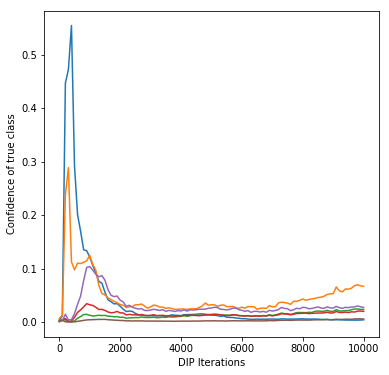

coral fungus
starfish
sea slug
earthstar
anemone fish


In [15]:
it = np.arange(0, iterations+99, 100)
iters = round((iterations-1)/100)
fig = plt.figure(figsize=(6, 6))
plt.xlabel('DIP Iterations')
plt.ylabel('Confidence of true class')
plt.plot(it,Confidence)
plt.show()

# Save stuff
fig.savefig('results/Adv_DIP/Simple_FGSM_100/Graph_Simple_FGSM_100_full.png')
np.savetxt('results/Adv_DIP/Simple_FGSM_100/Simple_FGSM_100_full.txt', Confidence)
np.savetxt('results/Adv_DIP/Simple_FGSM_100/Simple_FGSM_100_ranks.txt', Ranks_matrix)
for i in range(5):
    print(classes[int(Ranks_matrix[-1,i])].split(',')[0])

# Trying out more complex architectures

The architecture investigated now, will be the default architecture used for the deep image prior. It is the same one that was used to denoise the F_16_GT image (natural image).

We expect to have better results compared to the snail default architecture, in terms of DIP convergance

Method: Least Likely Class Iterative
Model: resnet18 

Prediction before attack:

Top 5 classes                 Confidence

goldfish                         0.99718
axolotl                          0.00078
American chameleon               0.00033
sea slug                         0.00029
anemone fish                     0.00019


Iter [  1/125]:  Prediction: goldfish              Confidence: 0.924     
Iter [  2/125]:  Prediction: goldfish              Confidence: 0.413     
Iter [  3/125]:  Prediction: goldfish              Confidence: 0.100     
Iter [  4/125]:  Prediction: goldfish              Confidence: 0.105     
Iter [  5/125]:  Prediction: goldfish              Confidence: 0.030     
Iter [  6/125]:  Prediction: goldfish              Confidence: 0.039     
Iter [  7/125]:  Prediction: pirate                Confidence: 0.086     
Iter [  8/125]:  Prediction: schooner              Confidence: 0.259     
Iter [  9/125]:  Prediction: schooner              Confidence: 0.521     
Ite

Iter [107/125]:  Prediction: schooner              Confidence: 1.000     
Iter [108/125]:  Prediction: schooner              Confidence: 1.000     
Iter [109/125]:  Prediction: schooner              Confidence: 1.000     
Iter [110/125]:  Prediction: schooner              Confidence: 1.000     
Iter [111/125]:  Prediction: schooner              Confidence: 1.000     
Iter [112/125]:  Prediction: schooner              Confidence: 1.000     
Iter [113/125]:  Prediction: schooner              Confidence: 1.000     
Iter [114/125]:  Prediction: schooner              Confidence: 1.000     
Iter [115/125]:  Prediction: schooner              Confidence: 1.000     
Iter [116/125]:  Prediction: schooner              Confidence: 1.000     
Iter [117/125]:  Prediction: schooner              Confidence: 1.000     
Iter [118/125]:  Prediction: schooner              Confidence: 1.000     
Iter [119/125]:  Prediction: schooner              Confidence: 1.000     
Iter [120/125]:  Prediction: schooner 

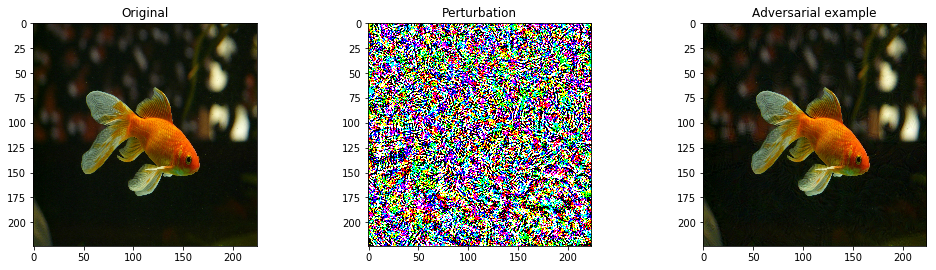

In [2]:
#Generating adversarial example
adv, orig, pert = adversarial_examples('data/goldfish.jpg',model_name = 'resnet18', method='LLCI',eps=100, show=True)

# Process image into the right format
img = adv.copy().astype(np.float32)
img /= 255.0
inpt = np_to_torch(img.transpose(2,0,1))

# Applying the Deep Image Prior for 10001 iterations and saving every 100
itn = 10001
#output = DIP(inpt, save = True, save_path = 'results/Adv_DIP/Complex_LLCI_eps5', num_iter = itn, PLOT = False, arch = 'complex')

In [ ]:
# Find original classification class
P, R = classification(orig, model_name = 'resnet18', sort = True, show=False)
original_class = R[0,0]
P, R = classification(adv, model_name = 'resnet18', sort = True, show=False)
final_classes = R[0,0:5]

# Create matrix to store values
Confidence = np.ones([round((iterations-1)/100+1),6])
Ranks_matrix = np.ones([round((iterations-1)/100+1),5])

for i in range(round((iterations-1)/100+1)):
    orig = cv2.imread("results/Adv_DIP/Complex_LLCI_eps5/it_{}.png".format(i*100))[..., ::-1]
    orig = cv2.resize(orig, (256, 256))
    img = orig.copy().astype(np.float32)
    Probs, Ranks = classification(img, model_name = 'resnet18', sort = False, show = False)
    Probs_np = torch_to_np(Probs)
    Confidence[i,0] = Probs_np[original_class]
    P , Ranking = Probs.sort(descending=True)
    Ranking_np = torch_to_np(Ranking)
    for j in range(5):
        Confidence[i,j+1] = Probs_np[final_classes[j]]
        Ranks_matrix[i,j] = Ranking_np[j]  